Read necessary libraries 

In [1]:
from matplotlib import pyplot as plt, rcParams, animation
import scipy, seaborn as sns, matplotlib
from scipy.cluster import hierarchy as hc
matplotlib.rc('animation', html='html5')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")

import ben

In [2]:
path = 'data/thesis/'

----

The purpose of the paper is to compare the performance of the two portfolios: Factor ETFs and Sector ETFs. The study adopts the mean-variance efficiency test, proposed by Basack, Jagannatha, and Sun 2002 (hereafter BJS (2002)) which calculates the difference between variance of a benchmark and a mimicking portfolio in the efficient frontier that has the same expected returns. Thanks to the properties of the BJS test, the market portfolio (refected by the S&P500 index) was also used as a benchmark to be compared with the two mentioned portfolios. 

### I. Data

1. 12 industry ETFs, each industry ETF is a column in a dataframe called "ind", these ETFs are designed by BlackRock
2. 07 factor ETFs representing factor investing, each strategy is a column in a dataframe called "factor", these ETFs are designed by BlackRock
3. S&P500 as market index and risk free rate (T-Bill one-month return) as rf

In [3]:
ind = ben.get_df('sector_return.xlsx', path); ind.tail(2)

,IDU,IYC,IYF,IYG,IYH,IYJ,IYK,IYM,IYR,IYT,IYW,IYZ
Date,,,,,,,,,,,,
2020-11,0.017353,0.127923,0.146394,0.177839,0.081918,0.156714,0.127564,0.133710,0.085795,0.118051,0.110713,0.119835
2020-12,-0.500868,-0.742240,-0.475615,0.066150,0.034975,-0.489512,0.062171,0.028103,0.017704,0.003275,-0.738336,0.013754


In [4]:
ind.shape

(89, 12)

In [5]:
factor = ben.get_df('factor_return.xlsx', path); factor.tail(2)

,EEMV,EFAV,MTUM,QUAL,SIZE,USMV,VLUE
Date,,,,,,,
2020-11,0.075328,0.087952,0.106281,0.112914,0.143132,0.080928,0.164269
2020-12,0.049445,0.030316,0.034305,0.036972,0.042422,0.022990,0.029008


In [6]:
factor.shape

(89, 7)

In [7]:
market_rf = ben.get_df_excel('sp500.xlsx', path); market_rf.head(2)

,Risk free,Market return
Date,,
2013-08,0.000009,-0.031298
2013-09,0.000008,0.029749


In [8]:
market_rf.shape

(89, 2)

In [9]:
mar_ret = market_rf['Market return'].mean()
mar_vol = market_rf['Market return'].std()
market = (mar_ret, mar_vol)
market

(0.009845607748314607, 0.04023132413238701)

In [10]:
rf = market_rf['Risk free'].mean()
rf

0.0005907303370786517

### II. Optimizing portfolio with the two approaches

The study closely follows procedures prescrided by Ehling and Ramos (2006) in comparing directly two diversified portfolios. Specifically, the two set of ETFs will be optimized to construct two efficient frontiers. This step will serve dual purposes: to anchor as a reference frontier and to pick two explicit points (GMV and tangency) as benchmarks. Next, the measure of efficiency ($\lambda$) will be calculated by solving the optimizing problem (P). Lastly, the BJS 2002 will be performed to consider the statistical significances of the results.

#### Efficient frontier comprising of industry indexes

In [11]:
ind_er = ind.mean()
ind_cov = ind.cov()

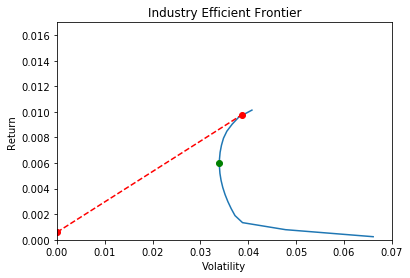

In [12]:
ben.plot_ef(ind_er, ind_cov, title='Industry Efficient Frontier',
            riskfree_rate=rf, show_cml=True, show_gmv=True)

In [13]:
ind_gmv = ben.port_gmv(ind_er, ind_cov) # global min. var. portfolio return and vol.
ind_gmv

(0.005970768463534384, 0.033953219749743344)

In [14]:
ind_tangency = ben.port_tangency(rf, ind_er, ind_cov) # Tangency portfolio return and vol.
ind_tangency

(0.009780220582153692, 0.03869415408690239)

#### Efficient frontier comprising of factors

In [15]:
factor_er = factor.mean()
factor_cov = factor.cov()

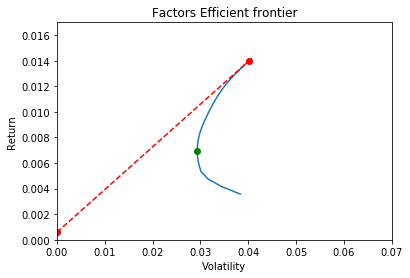

In [16]:
ben.plot_ef(factor_er, factor_cov, title='Factors Efficient frontier',
                       riskfree_rate=rf, show_cml=True, show_gmv=True)

In [17]:
factor_gmv = ben.port_gmv(factor_er, factor_cov) # global min. var. portfolio return and vol.
factor_gmv

(0.006974897020265774, 0.029321298642050703)

In [18]:
factor_tangency = ben.port_tangency(rf, factor_er, factor_cov) #Tangency port. return and vol.
factor_tangency

(0.0140006627475656, 0.04018024505697719)

#### Industry efficient frontier compared with factor's benchmarks

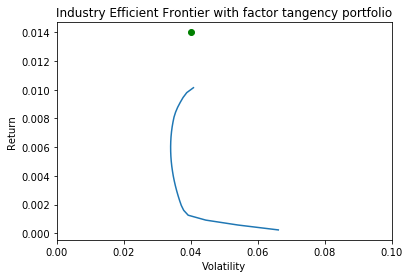

In [19]:
ben.plot_ef_with_bm(ind_er, ind_cov, factor_tangency, n_points=30,
                    title='Industry Efficient Frontier with factor tangency portfolio',
                    riskfree_rate=rf, show_bm=True)

#### ==> The efficient frontier can not attain the same level of return as the benchmark

----

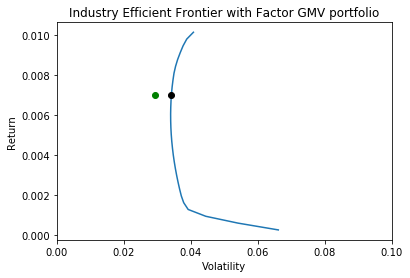

In [20]:
ben.plot_ef_with_bm(ind_er, ind_cov, factor_gmv, n_points=30, 
                    title='Industry Efficient Frontier with Factor GMV portfolio',
                    riskfree_rate=rf, show_bm=True, show_ef_point=True)

In [21]:
p_ind_gmv = ben.spotting_p(factor_gmv, ind_er, ind_cov)
p_ind_gmv

,Weight,Return,Vol
0,1.725909e-01,0.006975,0.034171
1,1.951564e-17,0.006975,0.034171
2,1.230569e-17,0.006975,0.034171
3,0.000000e+00,0.006975,0.034171
4,4.345866e-01,0.006975,0.034171
5,0.000000e+00,0.006975,0.034171
6,2.854774e-01,0.006975,0.034171
7,0.000000e+00,0.006975,0.034171
8,0.000000e+00,0.006975,0.034171
9,4.336809e-18,0.006975,0.034171


In [22]:
factor_gmv

(0.006974897020265774, 0.029321298642050703)

In [41]:
# lambda
ind_ef_gmv = p_ind_gmv['Vol'][0] - factor_gmv[1]
ind_ef_gmv

0.004849381969730931

----

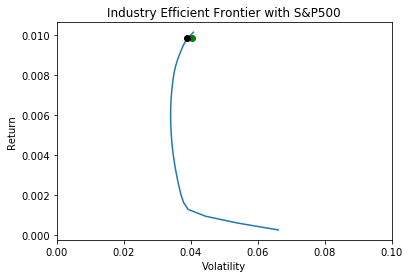

In [23]:
# with weights range from 0 to 1
ben.plot_ef_with_bm(ind_er, ind_cov, market, n_points=30, 
                    title='Industry Efficient Frontier with S&P500',
                    riskfree_rate=rf, show_bm=True, show_ef_point=True)

In [24]:
p_ind_sp500 = ben.spotting_p(market, ind_er, ind_cov)
p_ind_sp500

,Weight,Return,Vol
0,9.697809e-18,0.009846,0.038984
1,0.000000e+00,0.009846,0.038984
2,3.581175e-18,0.009846,0.038984
3,0.000000e+00,0.009846,0.038984
4,8.309356e-01,0.009846,0.038984
5,6.253531e-18,0.009846,0.038984
6,1.308725e-01,0.009846,0.038984
7,0.000000e+00,0.009846,0.038984
8,2.105391e-18,0.009846,0.038984
9,5.108008e-18,0.009846,0.038984


In [25]:
market

(0.009845607748314607, 0.04023132413238701)

In [42]:
# lambda
ind_ef_market = p_ind_sp500['Vol'][0] - market[1]
ind_ef_market

-0.001247012078153309

The S&P500 lies almost in the efficient frontier of industry ETFs

----

#### Industry as benchmark in the factor efficient frontier


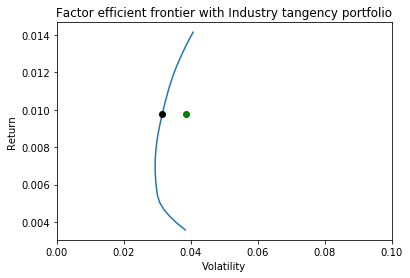

In [26]:
# weights range from 0 to 1
ben.plot_ef_with_bm(factor_er, factor_cov, ind_tangency,
                    title='Factor efficient frontier with Industry tangency portfolio',
                    n_points=30, riskfree_rate=rf, show_bm=True, show_ef_point=True)

In [27]:
p_factor_tan = ben.spotting_p(ind_tangency, factor_er, factor_cov)
p_factor_tan

,Weight,Return,Vol
0,0.000000e+00,0.00978,0.031456
1,1.595335e-01,0.00978,0.031456
2,9.349669e-02,0.00978,0.031456
3,0.000000e+00,0.00978,0.031456
4,0.000000e+00,0.00978,0.031456
5,7.469698e-01,0.00978,0.031456
6,3.636291e-17,0.00978,0.031456


In [28]:
ind_tangency

(0.009780220582153692, 0.03869415408690239)

In [45]:
# lambda
fac_ef_tan = p_factor_tan['Vol'][0] - ind_tangency[1]
fac_ef_tan

-0.0072384811059413925

----

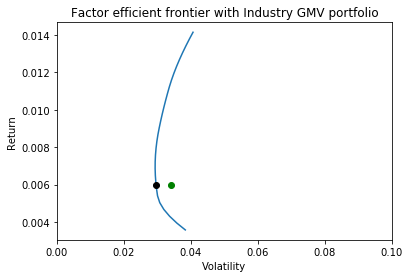

In [29]:
# weights range from 0 to 1
ben.plot_ef_with_bm(factor_er, factor_cov, ind_gmv,
                    title='Factor efficient frontier with Industry GMV portfolio',
                    n_points=30, riskfree_rate=rf, show_bm=True, show_ef_point=True)

In [30]:
p_factor_gmv = ben.spotting_p(ind_gmv, factor_er, factor_cov)
p_factor_gmv

,Weight,Return,Vol
0,4.163336e-17,0.005971,0.029617
1,8.904535e-01,0.005971,0.029617
2,0.000000e+00,0.005971,0.029617
3,0.000000e+00,0.005971,0.029617
4,6.938894e-18,0.005971,0.029617
5,1.095465e-01,0.005971,0.029617
6,6.938894e-18,0.005971,0.029617


In [31]:
ind_gmv

(0.005970768463534384, 0.033953219749743344)

In [43]:
# lambda
fac_ef_gmv = p_factor_gmv['Vol'][0] - ind_gmv[1]
fac_ef_gmv

-0.004336186192867554

----

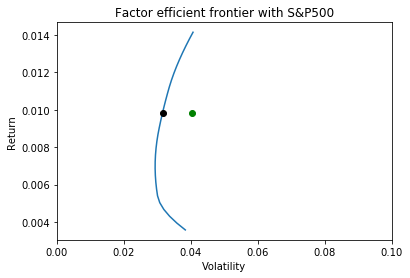

In [32]:
# weights range from 0 to 1
ben.plot_ef_with_bm(factor_er, factor_cov, market,
                    title='Factor efficient frontier with S&P500',
                    n_points=30, riskfree_rate=rf, show_bm=True, show_ef_point=True)

In [33]:
p_factor_sp500 = ben.spotting_p(market, factor_er, factor_cov)
p_factor_sp500

,Weight,Return,Vol
0,0.000000e+00,0.009846,0.031542
1,1.516453e-01,0.009846,0.031542
2,1.005783e-01,0.009846,0.031542
3,0.000000e+00,0.009846,0.031542
4,0.000000e+00,0.009846,0.031542
5,7.477764e-01,0.009846,0.031542
6,1.804026e-17,0.009846,0.031542


In [34]:
market

(0.009845607748314607, 0.04023132413238701)

In [44]:
# lambda
fac_ef_market = p_factor_sp500['Vol'][0] - market[1]
fac_ef_market

-0.0086897701189338

---

-----

### III. The BJS (2002) test with the null hypothesis $\lambda$ = 0

In [35]:
def calculating_bjs (portfolio_p, primitive_asset, benchmark):
    w_p = portfolio_p['Weight'].values
    r_p = primitive_asset @ w_p
    std_p = r_p.std()
    
    # calculating lambda
    lamda = std_p - benchmark[1] 
    
    # now perform the BJS 2002 test
    l = []
    for t in range(1,primitive_asset.shape[0]):
        f = primitive_asset.iloc[:t, :].values
        r = f @ w_p.T
        s = r.std()
        l.append(s - benchmark[1])
    l = np.array(l)
    l_std = l.std()
    
    # calculating z score
    z = (lamda * np.sqrt(primitive_asset.shape[0])) / l_std
    
    return z

#### ==> rejecting the null with one, two, and three stars with respect to probabilities of 10%, 5% and 1% (z = -2.58, -1.96, and -1.65)

Comparing factor ETFs with industry benchmark and S&P500 portfolios

In [36]:
calculating_bjs(p_factor_tan, factor, ind_tangency) # reject the null with three stars

-18.940505571073437

In [37]:
calculating_bjs(p_factor_gmv, factor, ind_gmv) # reject the null with three stars

-12.530703227176256

In [38]:
calculating_bjs(p_factor_sp500, factor, market) # reject the null with three stars

-22.671685236590058

Now let's treat industry ETFs as primitive assets

Can not attain when comparing with factor tangency portfolio

In [39]:
calculating_bjs(p_ind_gmv, ind, factor_gmv) # reject the null with three stars

11.795411049532376

In [40]:
calculating_bjs(p_ind_sp500, ind, market) # do not reject the null at 10%

-2.3123333148088294

----